In [1]:
import tensorflow_addons as tfa
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import random
import math

In [2]:
class CFG:
    dataset_dir="../input/ranzcr-clip-catheter-line-classification/"

train=pd.read_csv(f"{CFG.dataset_dir}train.csv")

In [12]:
tf.random.set_seed(123)

def preprocess(uid):
    path=f"{CFG.dataset_dir}train/"+uid+".jpg"
    file_bytes=tf.io.read_file(path)
    img=tf.io.decode_jpeg(file_bytes)
    return img

def augument(img):
    #max_angle=math.pi/12
    #angle=tf.random.uniform(shape=(1,),minval=(-max_angle),maxval=max_angle)
    #img=tfa.image.rotate(img,angles=angle)
    img=tf.image.random_brightness(img,max_delta=0.2)
    return img

dset=tf.data.Dataset.from_tensor_slices(train["StudyInstanceUID"])
dset=dset.map(preprocess)
dset=dset.map(augument)

In [5]:
def image_show(img,title=None):
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.imshow(img,cmap="gray")
    ax.set_title(title)
    ax.axis("off")

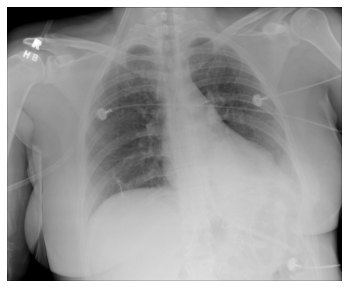

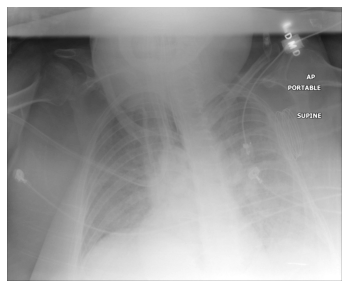

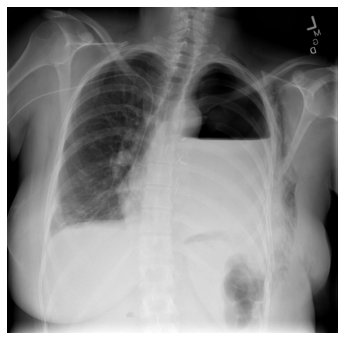

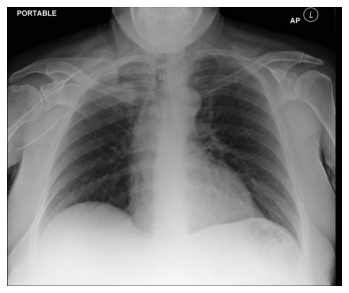

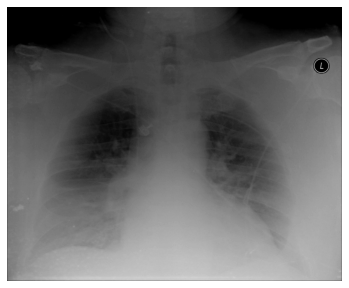

In [13]:
for img in dset.take(5):
    image_show(img)